In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
loan_test=pd.read_csv('C:/Users/user/Desktop/pythonfiles/loan_test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
cat_features=[features for features in loan_test.columns if loan_test[features].dtype=='O']
cat_features


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [6]:
cate_features=[features for features in cat_features if features!='Loan_ID']
cate_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [7]:
for features in cate_features:
    data=loan_test.copy()
    print(features,' ',(data[features].isnull().sum()/len(data[features])*100))

Gender   2.997275204359673
Married   0.0
Dependents   2.7247956403269753
Education   0.0
Self_Employed   6.267029972752043
Property_Area   0.0


In [8]:
# FILLING MISSING VALUES OF CATEGORICAL FEATURES( WITH MISSING TERM)

def cat_f(data,features):
    data[features]=data[features].fillna('Missing')
    return data
loan_test=cat_f(loan_test,cate_features)


In [9]:
loan_test[cate_features].isnull().sum()  # all missing values replaced

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [10]:
loan_test['Gender'].value_counts() # checking whether replaced or not

Male       286
Female      70
Missing     11
Name: Gender, dtype: int64

In [11]:
numerical_features=[features for features in loan_test.columns if loan_test[features].dtype!='O']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [12]:
num_features=[features for features in numerical_features if features!='Credit_History']
num_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [14]:
loan_test[num_features] # continuous numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
3,2340,2546,100.0,360.0
4,3276,0,78.0,360.0
...,...,...,...,...
362,4009,1777,113.0,360.0
363,4158,709,115.0,360.0
364,3250,1993,126.0,360.0
365,5000,2393,158.0,360.0


In [15]:
for features in num_features:
    data=loan_test.copy()
    print(features,' ',(data[features].isnull().sum()/len(data[features])*100))

ApplicantIncome   0.0
CoapplicantIncome   0.0
LoanAmount   1.3623978201634876
Loan_Amount_Term   1.6348773841961852


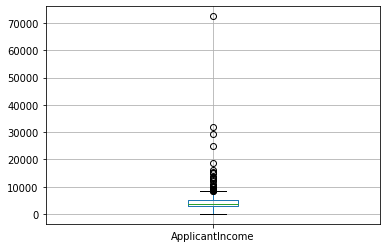

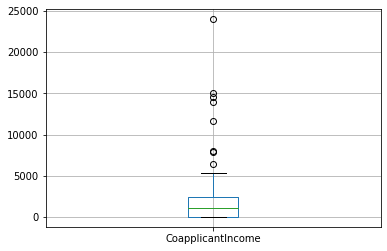

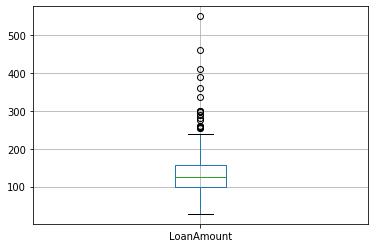

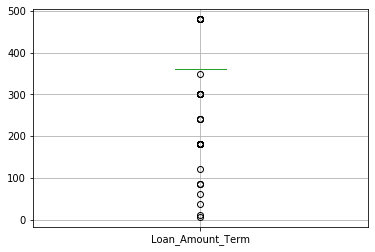

In [16]:
for features in num_features:
    loan_test.boxplot(column=features)
    plt.show()

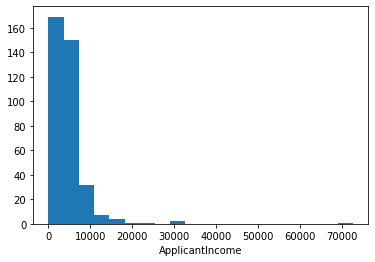

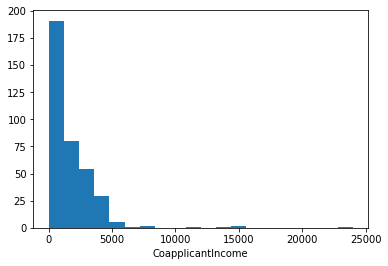

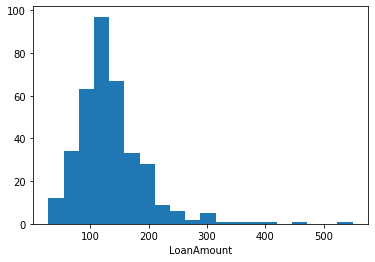

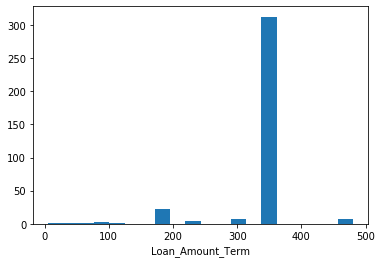

In [18]:
for features in num_features:
    plt.hist(loan_test[features],bins=20)
    plt.xlabel(features)
    plt.show()

In [19]:
for features in num_features:
    print(features,' ',loan_test[features].median())
    

ApplicantIncome   3786.0
CoapplicantIncome   1025.0
LoanAmount   125.0
Loan_Amount_Term   360.0


In [20]:
# replacing the missing values with the median values


def cat1_f(data,features):
    med=data[features].median()
    data[features]=data[features].fillna(med)
    return data

loan_test=cat1_f(loan_test,num_features)

In [21]:
loan_test[num_features].isnull().sum()  # all missing values replaced

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [22]:
# LOOKING IN THE CREDIT_HISTORY COLUMN

loan_test['Credit_History'].isnull().sum()/len(loan_test['Credit_History'])*100

# 7.90% missing values in credith_history

7.901907356948229

In [23]:
loan_test['Credit_History'].value_counts()

# it has 2 categories , and it is of integer datatype

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [24]:
# replacing credit_history missing values with'missing

loan_test['Credit_History']=loan_test['Credit_History'].fillna('Missing')

In [25]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null object
Property_Area        367 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 34.5+ KB


In [26]:
# converting the object datatypes to category datatype for the ease of encoding

for features in cate_features:
    loan_test[cate_features]=loan_test[cate_features].astype('category')

In [27]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null category
Married              367 non-null category
Dependents           367 non-null category
Education            367 non-null category
Self_Employed        367 non-null category
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null object
Property_Area        367 non-null category
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 20.2+ KB


In [28]:
loan_test['Credit_History']=loan_test['Credit_History'].astype('category')

In [29]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null category
Married              367 non-null category
Dependents           367 non-null category
Education            367 non-null category
Self_Employed        367 non-null category
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null category
Property_Area        367 non-null category
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 17.8+ KB


In [30]:
loan_test.to_csv(r'C:\Users\user\Desktop\pythonfiles\newtestdata_loan.csv' , index=False)